<a href="https://colab.research.google.com/github/Tusshagrwl047/Real-Estate-Housing-Price-Predictor/blob/main/USA%20Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path="/content/drive/MyDrive/USA_Housing.csv"
data=pd.read_csv(path)

In [4]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
# Data Preparation

In [8]:
data.drop(['Address'],axis=1,inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


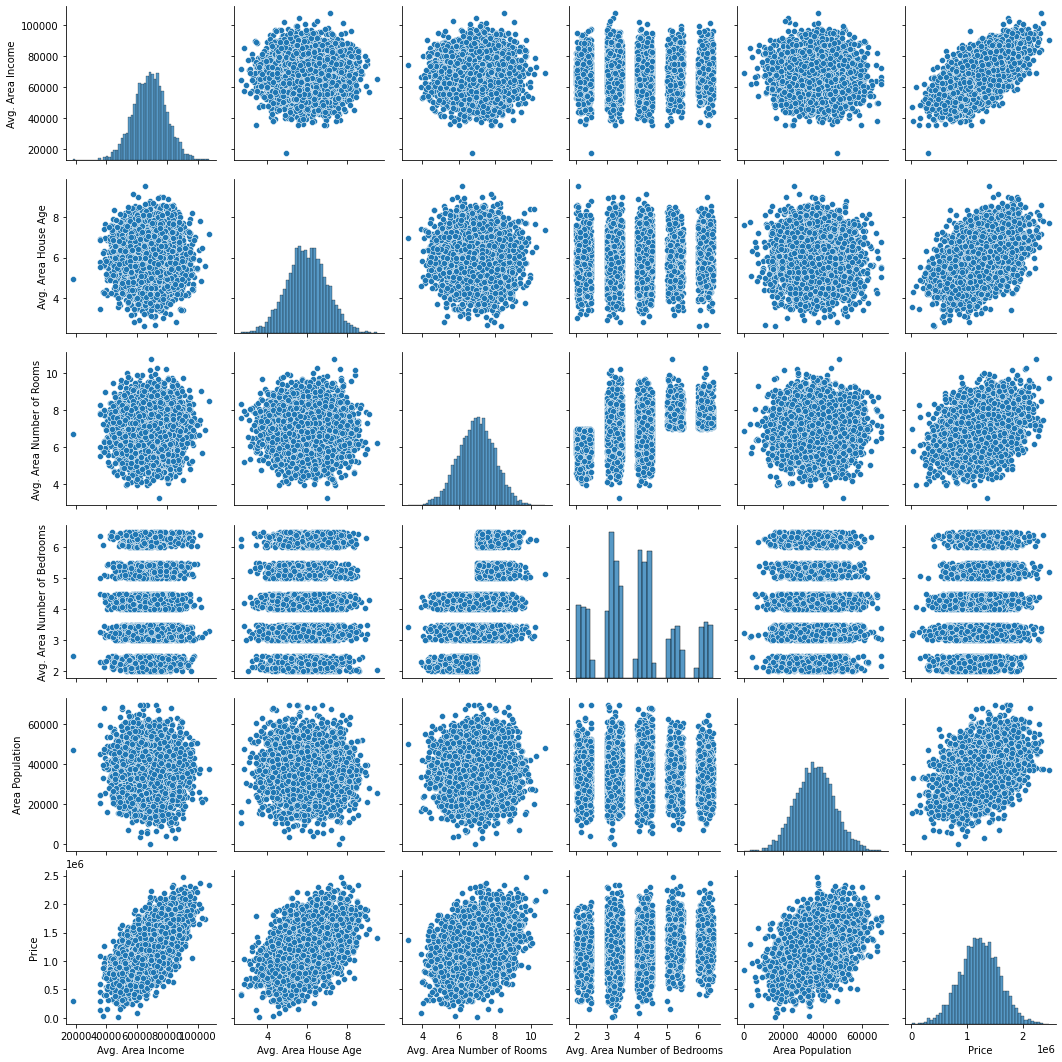

In [10]:
sns.pairplot( data)

In [11]:
# Covariance Matrix

In [12]:
data.cov()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.135928e+08,-21.205997,-118.261183,260.282865,-1.717327e+06,2.407654e+09
Avg. Area House Age,-2.120600e+01,0.982985,-0.009402,0.007524,-1.844447e+02,1.584354e+05
Avg. Area Number of Rooms,-1.182612e+02,-0.009402,1.011700,0.574360,2.036572e+01,1.192204e+05
Avg. Area Number of Bedrooms,2.602829e+02,0.007524,0.574360,1.523095,-2.715451e+02,7.455200e+04
Area Population,-1.717327e+06,-184.444655,20.365721,-271.545071,9.851853e+07,1.431956e+09
Price,2.407654e+09,158435.437813,119220.442375,74552.004915,1.431956e+09,1.246921e+11


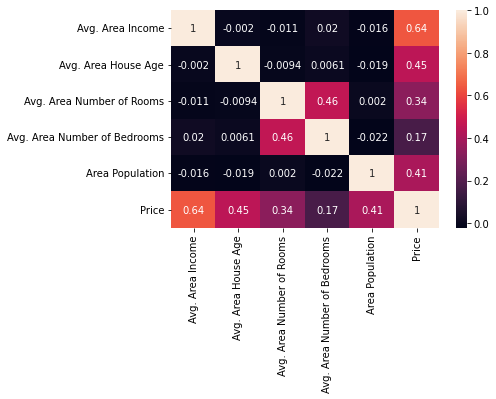

In [14]:
sns.heatmap(data.corr(),annot=True)

In [15]:
data.corr().Price.sort_values(ascending=False)

Price                           1.000000
Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Area Population                 0.408556
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Name: Price, dtype: float64

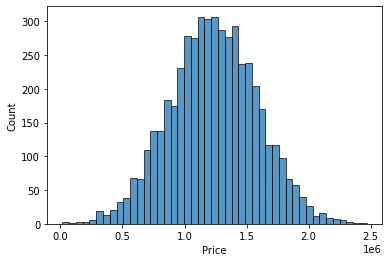

In [17]:
sns.histplot(data.Price)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


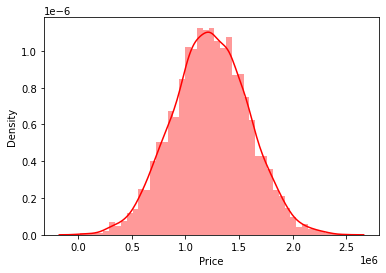

In [22]:
sns.distplot(data.Price,color='red')

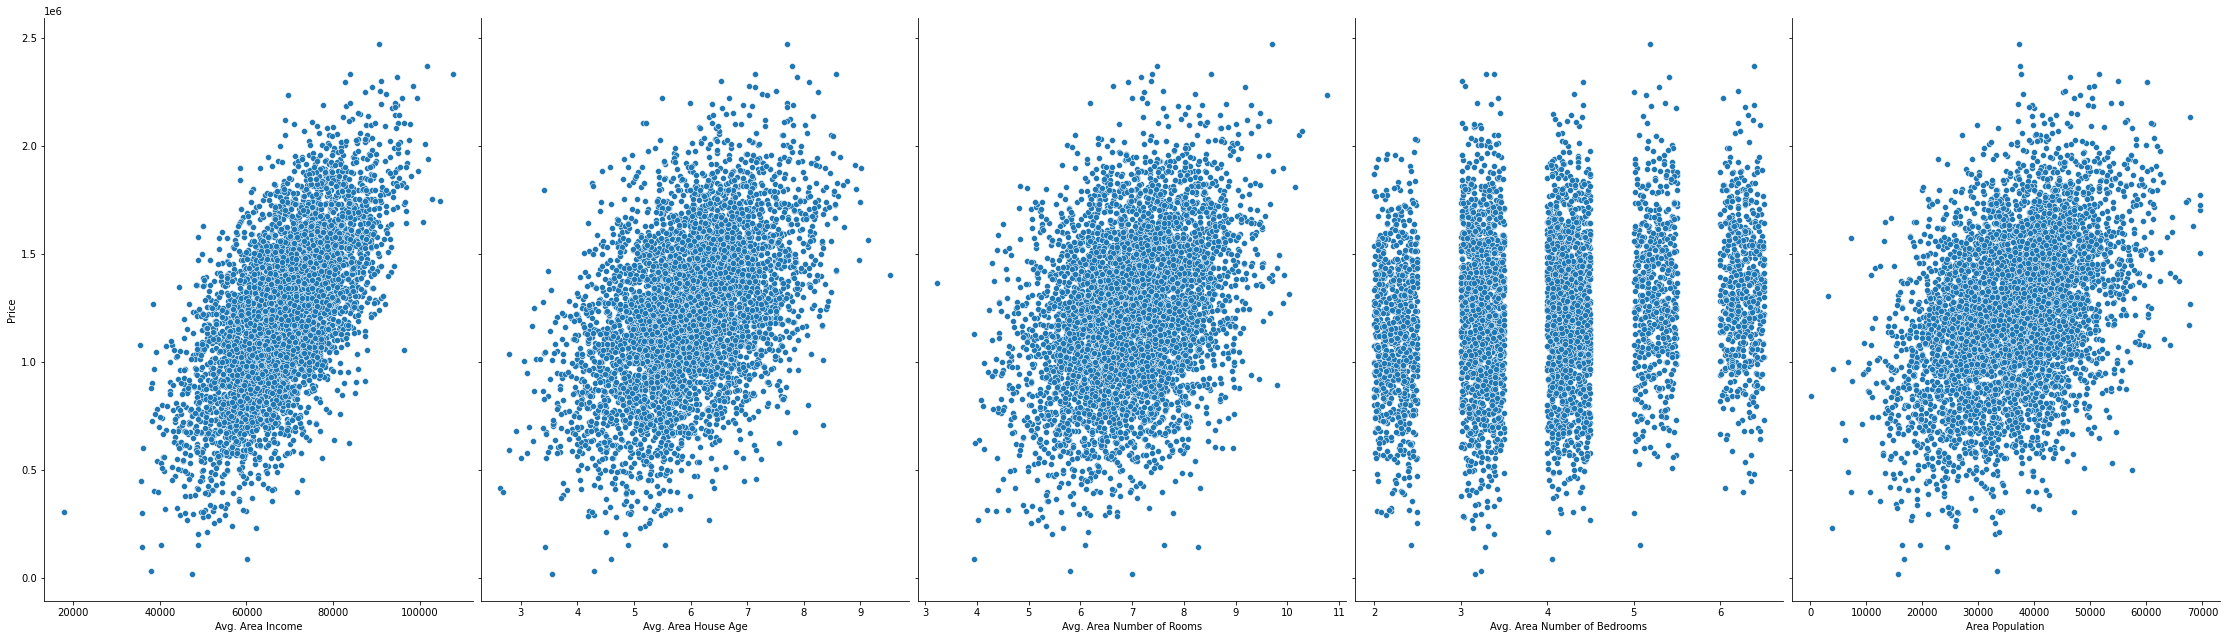

In [24]:
sns.pairplot(data, x_vars=['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population'], y_vars='Price',height=9, aspect=0.7, kind='scatter')

In [26]:
#Creating a Base Model

In [27]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler()


In [28]:
# Putting feature variable to X
X = data[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]

# Putting response variable to y
y = data['Price']


In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
dtypes: float64(5)
memory usage: 195.4 KB


In [32]:
X = pd.DataFrame(pre_process.fit_transform(X))

In [33]:
print(X)

             0         1         2         3         4
0     1.028660 -0.296927  0.021274  0.088062 -1.317599
1     1.000808  0.025902 -0.255506 -0.722301  0.403999
2    -0.684629 -0.112303  1.516243  0.930840  0.072410
3    -0.491499  1.221572 -1.393077 -0.584540 -0.186734
4    -0.807073 -0.944834  0.846742  0.201513 -0.988387
...        ...       ...       ...       ...       ...
4995 -0.752109  1.869297 -0.845588 -0.422467 -1.342732
4996  0.929740  1.030822 -0.408686  0.031337 -1.062747
4997 -0.487235  1.284470 -2.170269 -1.500251 -0.291937
4998 -0.054592 -0.446694  0.141541  1.182053  0.651116
4999 -0.288313  0.015215 -0.194342  0.071855  1.041625

[5000 rows x 5 columns]


In [34]:
X.head()

,0,1,2,3,4
0,1.028660,-0.296927,0.021274,0.088062,-1.317599
1,1.000808,0.025902,-0.255506,-0.722301,0.403999
2,-0.684629,-0.112303,1.516243,0.930840,0.072410
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387


In [35]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [36]:
# Train Test Split

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 5)
(1000, 5)
(4000,)
(1000,)


In [39]:
# Importing RFE and LinearRegression
from sklearn.linear_model import LinearRegression

In [40]:
Linear_R=LinearRegression()
Linear_R.fit(X_train,y_train)

LinearRegression()

In [66]:
# Making predictions using the model
y_pred = Linear_R.predict(X_test)
print(y_pred)

[1308587.92699753 1237037.22949428 1243429.34030687 ... 1457246.40714102
 1484811.56931063 1047698.00877525]


In [45]:
# print the intercept
print(Linear_R.intercept_)

1232002.674820156


In [48]:
# Let's see the coefficient
coeff_df = pd.DataFrame(Linear_R.coef_,X_test.columns,columns=['Coefficient'])
print(coeff_df)


     Coefficient
0  230745.940733
1  163243.273146
2  120309.773979
3    3011.459760
4  151552.630693


In [65]:
# Making predictions using the model
y_pred = Linear_R.predict(X_test)
print(y_test)

1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
            ...     
3563    1.348222e+06
1538    1.309937e+06
1837    1.472887e+06
2380    1.409762e+06
1912    1.009606e+06
Name: Price, Length: 1500, dtype: float64


In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [52]:
import math
RMSE=math.sqrt(mse)

In [57]:
print('Mean_absolute_Error :' ,mae)
print('r_square_value :',r_squared)
print('Mean_Squared_Error :' ,mse)
print(' Root_Mean_Square_error :',RMSE)

Mean_absolute_Error : 80879.09723489442
r_square_value : 0.9179971706834331
Mean_Squared_Error : 10089009300.893986
 Root_Mean_Square_error : 100444.0605555848


In [62]:
def mean_absolute_percentage_error(y_true,y_pred):
  y_true, y_pred=np.array(y_true),np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [68]:
#Check
MAPE=mean_absolute_percentage_error(y_test,y_pred)
print(MAPE)

7.345056934475895


Text(0, 0.5, 'Housing Price')

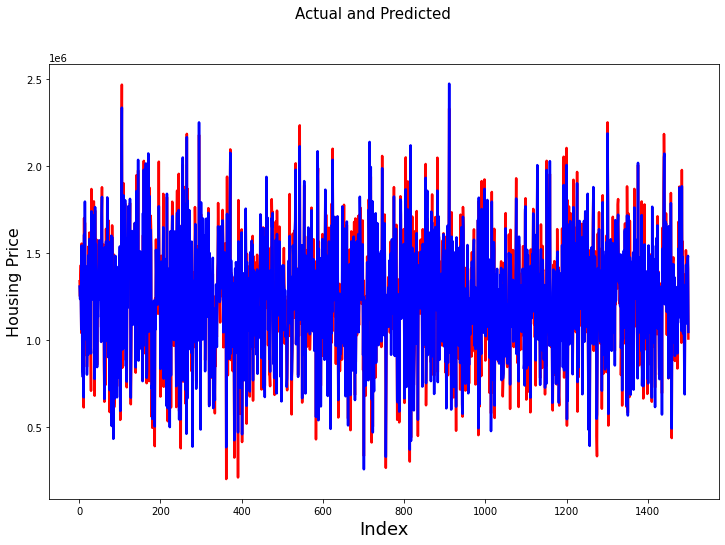

In [76]:
# Actual and Predicted
c = [i for i in range(1,1501,1)] # generating index 
fig = plt.figure(figsize=(12,8))
plt.plot(c,y_test, color="red", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="blue",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=15)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)                       # Y-label